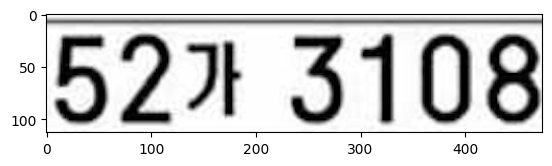

In [90]:
# 실행 파스
import pytesseract
from PIL import Image, ImageOps, ImageEnhance, ImageFilter
from matplotlib import pyplot as plt
import re
# Tesseractの実行ファイルのパスを指定
pytesseract.pytesseract.tesseract_cmd = '/opt/homebrew/bin/tesseract'

image_path = r'/Volumes/MEUSB/번호판2-1.png'
# 画像の読み込み
image = Image.open(image_path)

plt.imshow(image)

In [91]:
# 言語コード 認識
custom_config = r'--oem 3 --psm 6'
text = pytesseract.image_to_string(image, lang='kor+eng', config=custom_config)
clean_text = re.sub(r'[^\w\s]', '', text)
print(clean_text)

52 가 3108



In [92]:
# 言語コード 認識
def adjust_spaces(text):
    # 한글 뒤에 공백이 있을 경우, 공백을 한 개로 줄입니다.
    text = re.sub(r'([가-힣])\s+', r'\1 ', text)
    
    # 문장에서 한글 뒤를 제외한 모든 공백을 제거합니다.
    text = re.sub(r'\s+', ' ', text)  # 모든 공백을 하나로 줄입니다.
    text = re.sub(r'(\s)([가-힣])', r'\2', text)  # 한글 앞의 공백 제거
    
    return text.strip()  # 문자열의 앞뒤 공백 제거

custom_config = r'--oem 3 --psm 6'
text = pytesseract.image_to_string(image, lang='kor+eng', config=custom_config)
clean_text = re.sub(r'[^\w\s]', '', text)
adjusted_text = adjust_spaces(clean_text)
print(adjusted_text)

52가 3108
